# Pr√©paration des donn√©es pour construire un mod√®le

Lino Galiana  
2024-10-31

Ce chapitre utilise le jeu de donn√©es pr√©sent√© dans l‚Äô[introduction
de cette partie](index.qmd) :
les donn√©es de vote aux √©lections pr√©sidentielles am√©ricaines de 2020 au niveau des comt√©s
crois√©es √† des variables socio-d√©mographiques.
Le code de consitution de la base de donn√©es
est disponible [sur `Github`](https://github.com/linogaliana/python-datascientist/blob/main/content/modelisation/get_data.py).
L‚Äôexercice 1 permet, √† ceux qui le d√©sirent, d‚Äôessayer de le reconstituer pas √† pas.

Le guide utilisateur de `Scikit` est une r√©f√©rence pr√©cieuse,
√† consulter r√©guli√®rement. La partie sur le *preprocessing* est
disponible [ici](https://scikit-learn.org/stable/modules/preprocessing.html).

L‚Äôobjectif de ce chapitre est de pr√©senter quelques √©l√©ments de
pr√©paration des donn√©es. Il s‚Äôagit d‚Äôune √©tape fondamentale, √† ne
pas n√©gliger. Les mod√®les reposent sur certaines hypoth√®ses, g√©n√©ralement
relatives √† la distribution th√©orique des variables qui y sont int√©gr√©es.

Il est n√©cessaire de faire correspondre la distribution empirique
√† ces hypoth√®ses, ce qui implique un travail de restructuration des donn√©es.
Celui-ci permettra d‚Äôavoir des r√©sultats de mod√©lisation plus pertinents.
Nous verrons dans le chapitre sur les *pipelines* comment industrialiser
ces √©tapes de *preprocessing* afin de se simplifier la vie pour appliquer
un mod√®le sur un jeu de donn√©es diff√©rent de celui sur lequel il a √©t√© estim√©.

<div class="alert alert-warning" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-lightbulb"></i> <code>Scikit-Learn</code> </h3>

`scikit-learn` est aujourd‚Äôhui la librairie de r√©f√©rence dans l‚Äô√©cosyst√®me du
*Machine Learning*. Il s‚Äôagit d‚Äôune librairie qui, malgr√© les tr√®s nombreuses
m√©thodes impl√©ment√©es, pr√©sente l‚Äôavantage d‚Äô√™tre un point d‚Äôentr√©e unifi√©.
Cet aspect unifi√© est l‚Äôune des raisons du succ√®s pr√©coce de celle-ci. `R` n‚Äôa
b√©n√©fici√© que plus r√©cemment d‚Äôune librairie unifi√©e,
√† savoir [`tidymodels`](https://www.tidymodels.org/).

Une autre raison du succ√®s de `scikit` est son approche op√©rationnelle : la mise
en production de mod√®les d√©velopp√©s via les *pipelines* `scikit` est peu co√ªteuse.
Un [chapitre sp√©cial de ce cours](../../pipeline-scikit) est d√©di√© aux *pipelines*.
Avec Romain Avouac, nous proposons un [cours plus avanc√©](https://ensae-reproductibilite.github.io/website/)
en derni√®re ann√©e d‚ÄôENSAE o√π nous pr√©sentons certains enjeux relatifs
√† la mise en production de mod√®les d√©velopp√©s avec `scikit`.

Le coeur de l‚Äô√©quipe de d√©veloppement de `scikit-learn` est situ√©
√† l‚Äô[Inria](https://www.inria.fr/fr) üá´üá∑.
Pour d√©couvrir la richesse de l‚Äô√©cosyst√®me `scikit`, il
est recommand√© de suivre le
[`MOOC scikit`](https://www.fun-mooc.fr/fr/cours/machine-learning-python-scikit-learn/),
d√©velopp√© dans le cadre de l‚Äôinitiative [`Inria Academy`](https://www.inria.fr/fr/mooc-scikit-learn).

</div>

Les *packages* suivants sont n√©cessaires pour importer et visualiser
les donn√©es d‚Äô√©lection :

In [1]:
!pip install --upgrade xlrd #colab bug verson xlrd
!pip install geopandas

Dans ce chapitre, nous allons nous focaliser sur la pr√©paration
des donn√©es √† faire en amont du travail de mod√©lisation.
Cette √©tape est indispensable pour s‚Äôassurer de la coh√©rence
entre les donn√©es et les hypoth√®ses de mod√©lisation mais aussi
pour produire des analyses valides scientifiquement.

La d√©marche g√©n√©rale que nous adopterons dans ce chapitre, et
qui sera ensuite raffin√©e dans les prochains chapitres,
est la suivante :

![](https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/scikit_predict.png)

C‚Äôest l‚Äôapproche classique du *machine learning*. On d√©coupe
l‚Äôensemble des donn√©es disponibles en deux parties, √©chantillons
d‚Äôapprentissage et de validation. Le premier sert √† entra√Æner
un mod√®le et la qualit√© des pr√©dictions de celui-ci est
√©valu√©e sur le deuxi√®me pour limiter
le biais de surapprentissage. Le chapitre suivant approfondira
cette question de l‚Äô√©valuation des mod√®les. A ce stade de notre
progression, on se concentrera dans ce chapitre
sur la question des donn√©es. La librairie `Scikit` est non seulement
particuli√®rement
pratique parce qu‚Äôelle propose √©norm√©ment d‚Äôalgorithmes de *machine learning*
mais aussi parce qu‚Äôelle facilite la pr√©paration des donn√©es en amont,
ce qui est l‚Äôobjet de ce chapitre.

N√©anmoins, avant de se concentrer sur la pr√©paration des donn√©es, nous
allons passer un peu de temps √† explorer la structure des donn√©es
√† partir de laquelle nous d√©sirons construire une mod√©lisation. Ceci
est indispensable afin de comprendre la nature de celles-ci et choisir
une mod√©lisation ad√©quate.

# 1. Construction de la base de donn√©es

Les sources de donn√©es √©tant diverses, le code qui construit la base finale est directement fourni.
Le travail de construction d‚Äôune base unique
est un peu fastidieux mais il s‚Äôagit d‚Äôun bon exercice, que vous pouvez tenter,
pour [r√©viser `Pandas`](../../content/manipulation/02a_pandas_tutorial.qmd) :

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 1 : Importer les donn√©es des √©lections US</h3>

**Cet exercice est OPTIONNEL**

1.  T√©l√©charger et importer le shapefile [depuis ce lien](https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_02_sldl_500k.zip)
2.  Exclure les Etats suivants : ‚Äú02‚Äù, ‚Äú69‚Äù, ‚Äú66‚Äù, ‚Äú78‚Äù, ‚Äú60‚Äù, ‚Äú72‚Äù, ‚Äú15‚Äù
3.  Importer les r√©sultats des √©lections depuis [ce lien](https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2020_US_County_Level_Presidential_Results.csv)
4.  Importer les bases disponibles sur le site de l‚ÄôUSDA en faisant attention √† renommer les variables de code FIPS de mani√®re identique
    dans les 4 bases
5.  *Merger* ces 4 bases dans une base unique de caract√©ristiques socio√©conomiques
6.  *Merger* aux donn√©es √©lectorales √† partir du code FIPS
7.  *Merger* au shapefile √† partir du code FIPS. Faire attention aux 0 √† gauche dans certains codes. Il est
    recommand√© d‚Äôutiliser la m√©thode `str.lstrip` pour les retirer
8.  Importer les donn√©es des √©lections 2000 √† 2016 √† partir du [MIT Election Lab](https://electionlab.mit.edu/data)?
    Les donn√©es peuvent √™tre directement requ√™t√©es depuis l‚Äôurl
    <https://dataverse.harvard.edu/api/access/datafile/3641280?gbrecs=false>
9.  Cr√©er une variable `share` comptabilisant la part des votes pour chaque candidat.
    Ne garder que les colonnes `"year", "FIPS", "party", "candidatevotes", "share"`
10. Faire une conversion `long` to `wide` avec la m√©thode `pivot_table` pour garder une ligne
    par comt√© x ann√©e avec en colonnes les r√©sultats de chaque candidat dans cet √©tat.
11. Merger √† partir du code FIPS au reste de la base.

</div>

Si vous ne faites pas l‚Äôexercice 1, pensez √† charger les donn√©es en executant la fonction `get_data.py` :

In [2]:
import requests

url = "https://raw.githubusercontent.com/linogaliana/python-datascientist/main/content/modelisation/get_data.py"
r = requests.get(url, allow_redirects=True)
open("getdata.py", "wb").write(r.content)

import getdata

votes = getdata.create_votes_dataframes()


Ce code introduit une base nomm√©e `votes` dans l‚Äôenvironnement. Il s‚Äôagit d‚Äôune
base rassemblant les diff√©rentes sources. Elle a l‚Äôaspect
suivant :

In [3]:
votes.head(3)


3 rows √ó 383 columns

La carte choropl√®the suivante permet de visualiser rapidement les r√©sultats
(l‚ÄôAlaska et Hawa√Ø ont √©t√© exclus).

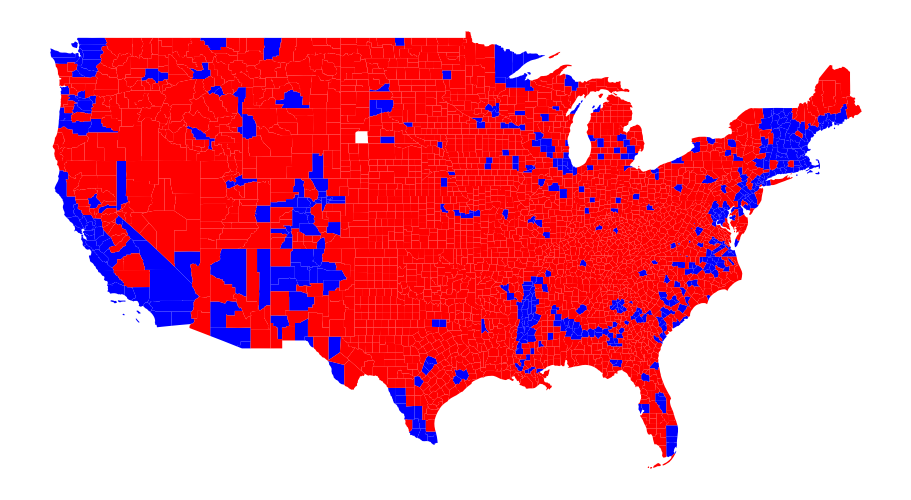

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# republican : red, democrat : blue
color_dict = {"republican": "#FF0000", "democrats": "#0000FF"}

fig, ax = plt.subplots(figsize=(12, 12))
grouped = votes.groupby("winner")
for key, group in grouped:
    group.plot(ax=ax, column="winner", label=key, color=color_dict[key])
plt.axis("off")


Les cartes choropl√®thes peuvent donner une impression fallacieuse
ce qui explique que
ce type de carte a servi
de justification pour contester les r√©sultats du vote.
En effet, un biais
connu des repr√©sentations choropl√®thes est qu‚Äôelles donnent une importance
visuelle excessive aux grands espaces. Or, ceux-ci sont souvent des espaces
peu denses et influencent donc moins la variable d‚Äôint√©r√™t (en l‚Äôoccurrence
le taux de vote en faveur des r√©publicains/d√©mocrates). Une repr√©sentation √†
privil√©gier pour ce type de ph√©nom√®nes est les
ronds proportionnels (voir Insee (2018), *‚ÄúLe pi√®ge territorial en cartographie‚Äù*).

Le [GIF ‚ÄúLand does not vote, people do‚Äù](https://www.core77.com/posts/90771/A-Great-Example-of-Better-Data-Visualization-This-Voting-Map-GIF)
qui avait eu un certain succ√®s en 2020 propose un autre mode de visualisation.
La carte originale a √©t√© construite avec `JavaScript`. Cependant,
on dispose avec `Python` de plusieurs outils
pour r√©pliquer, √† faible co√ªt, cette carte
gr√¢ce √†
l‚Äôune des surcouches √† `JavaScript` vues dans la partie [visualisation](#visualisation).

En l‚Äôoccurrence, on peut utiliser `Plotly` pour tenir compte de la population
et faire une carte en ronds proportionnels.
Le code suivant permet de construire une carte adapt√©e :

In [5]:
import plotly
import plotly.graph_objects as go
import pandas as pd
import geopandas as gpd


centroids = votes.copy()
centroids.geometry = centroids.centroid
centroids["size"] = (
    centroids["CENSUS_2010_POP"] / 10000
)  # to get reasonable plotable number

color_dict = {"republican": "#FF0000", "democrats": "#0000FF"}
centroids["winner"] = np.where(
    centroids["votes_gop"] > centroids["votes_dem"], "republican", "democrats"
)


centroids["lon"] = centroids["geometry"].x
centroids["lat"] = centroids["geometry"].y
centroids = pd.DataFrame(
    centroids[["county_name", "lon", "lat", "winner", "CENSUS_2010_POP", "state_name"]]
)
groups = centroids.groupby("winner")

df = centroids.copy()

df["color"] = df["winner"].replace(color_dict)
df["size"] = df["CENSUS_2010_POP"] / 6000
df["text"] = (
    df["CENSUS_2010_POP"]
    .astype(int)
    .apply(lambda x: "<br>Population: {:,} people".format(x))
)
df["hover"] = (
    df["county_name"].astype(str)
    + df["state_name"].apply(lambda x: " ({}) ".format(x))
    + df["text"]
)

fig_plotly = go.Figure(
    data=go.Scattergeo(
        locationmode="USA-states",
        lon=df["lon"],
        lat=df["lat"],
        text=df["hover"],
        mode="markers",
        marker_color=df["color"],
        marker_size=df["size"],
        hoverinfo="text",
    )
)

fig_plotly.update_traces(
    marker={
        "opacity": 0.5,
        "line_color": "rgb(40,40,40)",
        "line_width": 0.5,
        "sizemode": "area",
    }
)

fig_plotly.update_layout(
    title_text='Reproduction of the "Acres don\'t vote, people do" map <br>(Click legend to toggle traces)',
    showlegend=True,
    geo={"scope": "usa", "landcolor": "rgb(217, 217, 217)"},
)


In [6]:
fig_plotly.show()


Les cercles proportionnels permettent ainsi √† l‚Äôoeil de se concentrer sur les
zones les plus denses et non sur les grands espaces. Cette fois, on voit bien
que le vote d√©mocrate est majoritaire, ce que cachait l‚Äôaplat de couleur.

# 2. Explorer la structure des donn√©es

La premi√®re √©tape n√©cessaire √† suivre avant de se lancer dans la mod√©lisation
est de d√©terminer les variables √† inclure dans le mod√®le.

Les fonctionnalit√©s de `Pandas` sont, √† ce niveau, suffisantes pour explorer des structures simples.
N√©anmoins, lorsqu‚Äôon est face √† un jeu de donn√©es pr√©sentant de
nombreuses variables explicatives (*features* en machine learning, *covariates* en √©conom√©trie),
il est souvent judicieux d‚Äôavoir une premi√®re √©tape de s√©lection de variables,
ce que nous verrons par la suite dans la [partie d√©di√©e](4_featureselection.qmd).

Avant d‚Äô√™tre en mesure de s√©lectionner le meilleur ensemble de variables explicatives,
nous allons en prendre un nombre restreint et arbitraire.
La premi√®re t√¢che est de repr√©senter les relations entre les donn√©es,
notamment la relation des variables explicatives
√† la variable d√©pendante (le score du parti r√©publicain)
ainsi que les relations entre les variables explicatives.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 2 : Regarder les corr√©lations entre les variables</h3>

**Cet exercice est OPTIONNEL**

1.  Cr√©er un DataFrame `df2` plus petit avec les variables `winner`, `votes_gop`, `Unemployment_rate_2019`,
    `Median_Household_Income_2019`,
    `Percent of adults with less than a high school diploma, 2015-19`,
    `Percent of adults with a bachelor's degree or higher, 2015-19`
2.  Repr√©senter gr√¢ce √† un graphique la matrice de corr√©lation. Vous pouvez utiliser le *package* `seaborn` et sa fonction `heatmap`.
3.  Repr√©senter une matrice de nuages de points des variables de la base `df2` avec `pd.plotting.scatter_matrix`
4.  (optionnel) Refaire ces figures avec `Plotly` qui offre √©galement la possibilit√© de faire une matrice de corr√©lation.

</div>

In [8]:
# 1. Cr√©er le data.frame df2.
df2 = votes.set_index("GEOID").loc[
    :,
    [
        "winner",
        "votes_gop",
        "Unemployment_rate_2019",
        "Median_Household_Income_2019",
        "Percent of adults with less than a high school diploma, 2015-19",
        "Percent of adults with a bachelor's degree or higher, 2015-19",
    ],
]


In [9]:
# 2. Matrice de corr√©lation graphique
g1 = sns.heatmap(
    df2.drop("winner", axis=1).corr(), cmap="coolwarm", annot=True, fmt=".2f"
)

# Construction directement avec pandas √©galement possible
g2 = (
    df2.drop("winner", axis=1)
    .corr()
    .style.background_gradient(cmap="coolwarm")
    .format("{:.2f}")
)


La matrice construite avec `seaborn` (question 2) aura l‚Äôaspect suivant :

<Axes: >

Alors que celle construite directement avec `corr` de `Pandas`
ressemblera plut√¥t √† ce tableau :

Le nuage de point obtenu √† l‚Äôissue de la question 3 ressemblera √† :

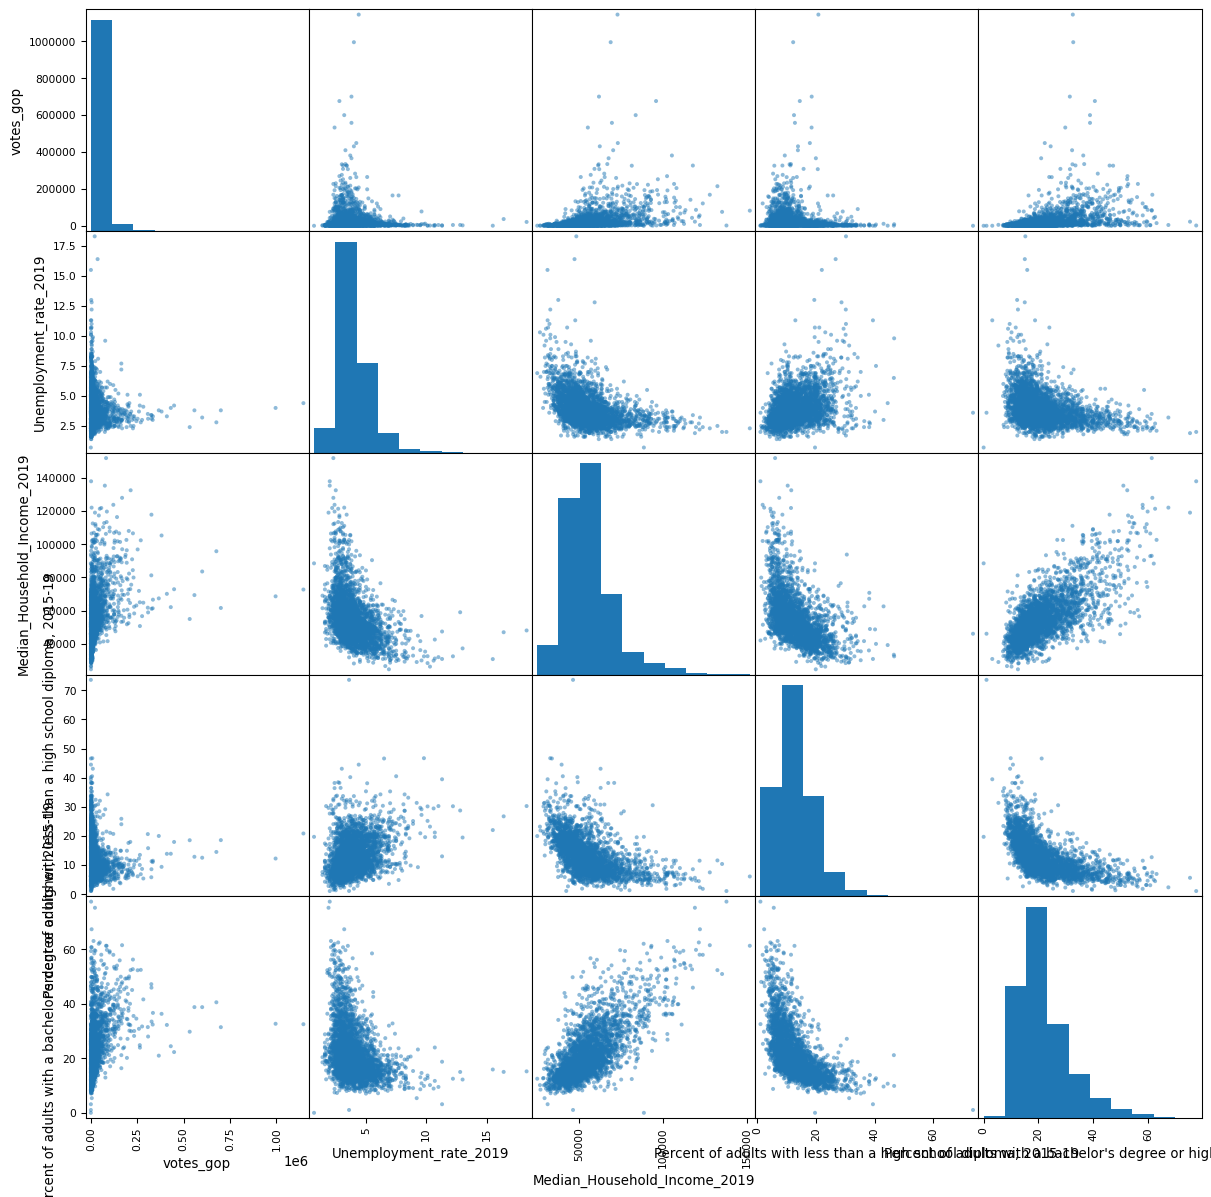

In [12]:
# 3. Matrice de nuages de points
ax = pd.plotting.scatter_matrix(df2, figsize=(15, 15))


array([[<Axes: xlabel='votes_gop', ylabel='votes_gop'>,
        <Axes: xlabel='Unemployment_rate_2019', ylabel='votes_gop'>,
        <Axes: xlabel='Median_Household_Income_2019', ylabel='votes_gop'>,
        <Axes: xlabel='Percent of adults with less than a high school diploma, 2015-19', ylabel='votes_gop'>,
        <Axes: xlabel="Percent of adults with a bachelor's degree or higher, 2015-19", ylabel='votes_gop'>],
       [<Axes: xlabel='votes_gop', ylabel='Unemployment_rate_2019'>,
        <Axes: xlabel='Unemployment_rate_2019', ylabel='Unemployment_rate_2019'>,
        <Axes: xlabel='Median_Household_Income_2019', ylabel='Unemployment_rate_2019'>,
        <Axes: xlabel='Percent of adults with less than a high school diploma, 2015-19', ylabel='Unemployment_rate_2019'>,
        <Axes: xlabel="Percent of adults with a bachelor's degree or higher, 2015-19", ylabel='Unemployment_rate_2019'>],
       [<Axes: xlabel='votes_gop', ylabel='Median_Household_Income_2019'>,
        <Axes: xlabel=

Le r√©sultat de la question 4 devrait, quant √† lui,
ressembler au graphique suivant :

In [14]:
# 4. Matrice de corr√©lation avec plotly
import plotly
import plotly.express as px

htmlsnip2 = px.scatter_matrix(df2)
htmlsnip2.update_traces(diagonal_visible=False)
htmlsnip2.show()


# 3. Transformer les donn√©es

Les diff√©rences d‚Äô√©chelle ou de distribution entre les variables peuvent
diverger des hypoth√®ses sous-jacentes dans les mod√®les.

Par exemple, dans le cadre
de la r√©gression lin√©aire, les variables cat√©gorielles ne sont pas trait√©es √† la m√™me
enseigne que les variables ayant valeur dans $\mathbb{R}$. Une variable
discr√®te (prenant un nombre fini de valeurs) devra √™tre transform√©e en suite de
variables 0/1 par rapport √† une modalit√© de r√©f√©rence pour √™tre en ad√©quation
avec les hypoth√®ses de la r√©gression lin√©aire.
On appelle ce type de transformation
*one-hot encoding*, sur laquelle nous reviendrons. Il s‚Äôagit d‚Äôune transformation,
parmi d‚Äôautres, disponibles dans `scikit` pour mettre en ad√©quation un jeu de
donn√©es et des hypoth√®ses math√©matiques.

L‚Äôensemble de ces t√¢ches s‚Äôappelle le *preprocessing*. L‚Äôun des int√©r√™ts
d‚Äôutiliser `Scikit` est qu‚Äôon peut consid√©rer qu‚Äôune t√¢che de *preprocessing*
est, en fait, une t√¢che d‚Äôapprentissage. En effet, le *preprocessing*
consiste √† apprendre des param√®tres d‚Äôune structure
de donn√©es (par exemple estimer moyennes et variances pour les retrancher √† chaque
observation) et on peut tr√®s bien appliquer ces param√®tres
√† des observations qui n‚Äôont pas servi √† construire
ceux-ci. Ainsi, en gardant en t√™te l‚Äôapproche g√©n√©rale avec `Scikit`,

![](https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/scikit_predict.png)

nous allons voir deux processus tr√®s classiques de *preprocessing* :

1.  La **standardisation** transforme des donn√©es pour que la distribution empirique suive une loi $\mathcal{N}(0,1)$.

2.  La **normalisation** transforme les donn√©es de mani√®re √† obtenir une norme ($\mathcal{l}_1$ ou $\mathcal{l}_2$) unitaire. Autrement dit, avec la norme ad√©quate, la somme des √©l√©ments est √©gale √† 1.

<div class="alert alert-danger" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-triangle-exclamation"></i> Warning</h3>

Pour un statisticien,
le terme *normalization* dans le vocable `Scikit` peut avoir un sens contre-intuitif.
On s‚Äôattendrait √† ce que la normalisation consiste √† transformer une variable de mani√®re √† ce que $X \sim \mathcal{N}(0,1)$.
C‚Äôest, en fait, la **standardisation** en `Scikit` qui fait cela.

</div>

## 3.1 Standardisation

La standardisation consiste √† transformer des donn√©es pour que la distribution empirique suive une loi $\mathcal{N}(0,1)$. Pour √™tre performants, la plupart des mod√®les de *machine learning* n√©cessitent souvent d‚Äôavoir des donn√©es dans cette distribution.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 3: Standardisation</h3>

1.  Standardiser la variable `Median_Household_Income_2019` (ne pas √©craser les valeurs !) et regarder l‚Äôhistogramme avant/apr√®s normalisation.

*Note : On obtient bien une distribution centr√©e √† z√©ro et on pourrait v√©rifier que la variance empirique soit bien √©gale √† 1. On pourrait aussi v√©rifier que ceci est vrai √©galement quand on transforme plusieurs colonnes √† la fois.*

1.  Cr√©er `scaler`, un `Transformer` que vous construisez sur les 1000 premi√®res lignes de votre DataFrame `df2` √† l‚Äôexception de la variable √† expliquer `winner`. V√©rifier la moyenne et l‚Äô√©cart-type de chaque colonne sur ces m√™mes observations.

*Note : Les param√®tres qui seront utilis√©s pour une standardisation ult√©rieure sont stock√©s dans les attributs `.mean_` et `.scale_`*

On peut voir ces attributs comme des param√®tres entra√Æn√©s sur un certain jeu de
donn√©es et qu‚Äôon peut r√©utiliser sur un autre, √† condition que les
dimensions co√Øncident.

1.  Appliquer `scaler` sur les autres lignes du DataFrame et comparer les distributions obtenues de la variable `Median_Household_Income_2019`.

*Note : Une fois appliqu√©s √† un autre `DataFrame`, on peut remarquer que la distribution n‚Äôest pas exactement centr√©e-r√©duite dans le `DataFrame` sur lequel les param√®tres n‚Äôont pas √©t√© estim√©s. C‚Äôest normal, l‚Äô√©chantillon initial n‚Äô√©tait pas al√©atoire, les moyennes et variances de cet √©chantillon n‚Äôont pas de raison de co√Øncider avec les moments de l‚Äô√©chantillon complet.*

</div>

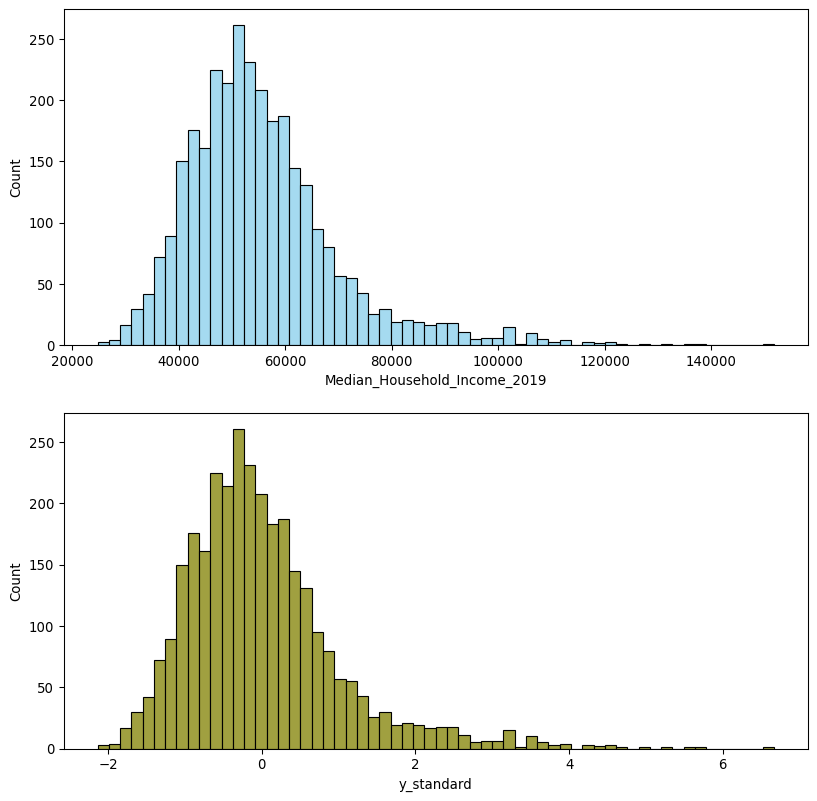

Moyenne de chaque variable sur 1000 premi√®res observations avant :  [ 1.73616500e+04  3.84530000e+00  5.51891150e+04  1.29669150e+01
  2.15813433e+01 -2.73468885e-02]
Ecart-type de chaque variable sur 1000 premi√®res observations avant :  [3.28113703e+04 1.28903822e+00 1.33256197e+04 6.45536365e+00
 9.41139584e+00 9.23129044e-01]
Moyenne de chaque variable sur 1000 premi√®res observations apr√®s :  [-3.37507799e-17  2.66453526e-17  1.58095759e-16  1.42108547e-17
  1.24344979e-17 -1.59872116e-17]
Ecart-type de chaque variable sur 1000 premi√®res observations apr√®s :  [1. 1. 1. 1. 1. 1.]

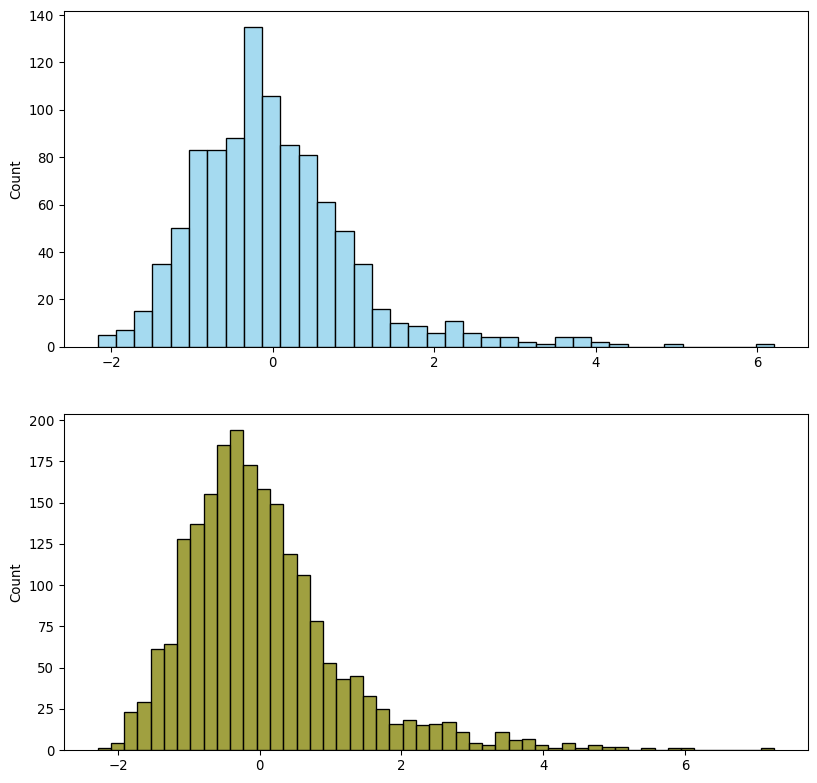

## 3.2 Normalisation

La **normalisation** est l‚Äôaction de transformer les donn√©es de mani√®re
√† obtenir une norme ($\mathcal{l}_1$ ou $\mathcal{l}_2$) unitaire.
Autrement dit, avec la norme ad√©quate, la somme des √©l√©ments est √©gale √† 1.
Par d√©faut, la norme est dans $\mathcal{l}_2$.
Cette transformation est particuli√®rement utilis√©e en classification de texte ou pour effectuer du *clustering*.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 4 : Normalisation</h3>

1.  Normaliser la variable `Median_Household_Income_2019` (ne pas √©craser les valeurs !) et regarder l‚Äôhistogramme avant/apr√®s normalisation.
2.  V√©rifier que la norme $\mathcal{l}_2$ est bien √©gale √† 1.

</div>

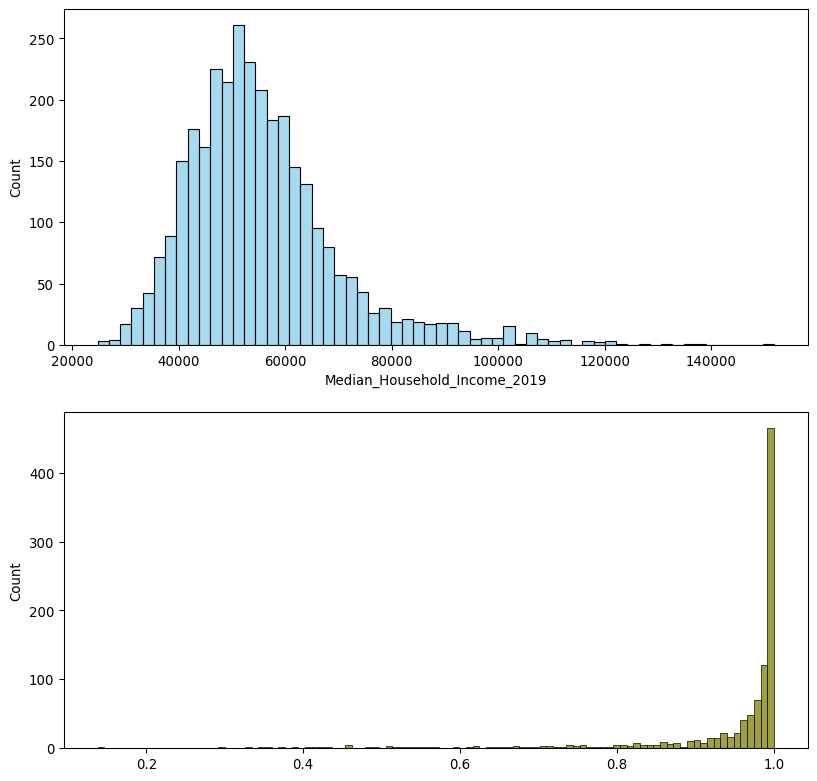

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## 3.3 Encodage des valeurs cat√©gorielles

Les donn√©es cat√©gorielles doivent √™tre recod√©es
sous forme de valeurs num√©riques pour √™tre int√©gr√©s aux mod√®les de *machine learning*.
Cela peut √™tre fait de plusieurs mani√®res :

-   `LabelEncoder`: transforme un vecteur `["a","b","c"]` en vecteur num√©rique `[0,1,2]`.
    Cette approche a l‚Äôinconv√©nient d‚Äôintroduire un ordre dans les modalit√©s, ce qui n‚Äôest pas toujours souhaitable

-   `OrdinalEncoder`: une version g√©n√©ralis√©e du `LabelEncoder` qui a vocation √† s‚Äôappliquer sur des matrices ($X$),
    alors que `LabelEncoder` s‚Äôapplique plut√¥t √† un vecteur ($y$)

-   `pandas.get_dummies` effectue une op√©ration de *dummy expansion*.
    Un vecteur de taille *n* avec *K* cat√©gories sera transform√© en matrice de taille $n \times K$
    pour lequel chaque colonne sera une variable *dummy* pour la modalit√© *k*.
    Il y a ici $K$ modalit√©s et il y a donc multicolin√©arit√©.
    Avec une r√©gression lin√©aire avec constante,
    il convient de retirer une modalit√© avant l‚Äôestimation.

-   `OneHotEncoder` est une version g√©n√©ralis√©e (et optimis√©e) de la *dummy expansion*.
    Il a plut√¥t vocation √† s‚Äôappliquer sur les *features* ($X$) du mod√®le

## 3.4 Imputation

Les donn√©es peuvent souvent contenir des valeurs manquantes, autrement dit des cases de notre *DataFrame* contenant un `NaN`.
Ces trous dans les donn√©es peuvent √™tre √† l‚Äôorigine de *bugs* ou de mauvaises interpr√©tations lorsque l‚Äôon passe √† la mod√©lisation.
Pour y rem√©dier, une premi√®re approche peut √™tre de retirer toutes les observations pr√©sentant un `NaN` dans au moins l‚Äôune des colonnes.
Cependant, si notre table contient beaucoup de `NaN`, ou bien que ces derniers sont r√©partis sur de nombreuses colonnes,
c‚Äôest aussi prendre le risque de retirer un nombre important de lignes, et avec cela de l‚Äôinformation importante pour un mod√®le car les valeurs manquantes sont rarement [r√©parties de mani√®re al√©atoire](https://stefvanbuuren.name/fimd/sec-MCAR.html).

M√™me si dans plusieurs situations, cette solution reste tout √† fait viable, il existe une autre approche plus robuste appel√©e *imputation*.
Cette m√©thode consiste √† remplacer les valeurs vides par une valeur donn√©e. Par exemple :

-   Imputation par la moyenne : remplacer tous les `NaN` dans une colonne par la valeur moyenne de la colonne ;
-   Imputation par la m√©diane sur le m√™me principe, ou par la valeur de la colonne la plus fr√©quente pour les variables cat√©gorielles ;
-   Imputation par r√©gression : se servir d‚Äôautres variables pour essayer d‚Äôinterpoler une valeur de remplacement adapt√©e.

Des m√©thodes plus complexes existent, mais dans de nombreux cas,
les approches ci-dessus peuvent suffire pour donner des r√©sultats beaucoup plus satisfaisants.
Le package `Scikit` permet de faire de l‚Äôimputation de mani√®re tr√®s simple ([documentation ici](https://scikit-learn.org/stable/modules/impute.html)).

## 3.5 Gestion des outliers

Les valeurs aberrantes (*outliers* en anglais) sont des observations qui se situent significativement √† l‚Äôext√©rieur de la tendance g√©n√©rale des autres observations dans un ensemble de donn√©es. En d‚Äôautres termes, ce sont des points de donn√©es qui se d√©marquent de mani√®re inhabituelle par rapport √† la distribution globale des donn√©es.
Cela peut √™tre d√ª √† des erreurs de remplissage, des personnes ayant mal r√©pondu √† un questionnaire, ou
parfois simplement des valeurs extr√™mes qui peuvent biaiser un mod√®le de fa√ßon trop importante.

A titre d‚Äôexemple, cela va √™tre 3 individus mesurant plus de 4 m√®tres dans une population,
ou bien des revenus de m√©nage d√©passant les 10M d‚Äôeuros par mois sur l‚Äô√©chelle d‚Äôun pays, etc.

Une bonne pratique peut donc √™tre de syst√©matiquement regarder la distribution des variables √† disposition,
pour se rendre compte si certaines valeurs s‚Äô√©loignent de fa√ßon trop importante des autres.
Ces valeurs vont parfois nous int√©resser, si par exemple on se concentre uniquement sur les tr√®s hauts revenus (top 0.1%)
en France. Cependant, ces donn√©es vont souvent nous g√™ner plus qu‚Äôautre chose, surtout si elles n‚Äôont pas de sens dans le monde r√©el.

Si l‚Äôon estime que la pr√©sence de ces donn√©es extr√™mes, ou *outliers*, dans notre base de donn√©es vont √™tre probl√©matiques plus qu‚Äôautre chose,
alors il est tout √† fait entendable et possible de simplement les retirer.
La plupart du temps, on va se donner une proportion des donn√©es √† retirer, par exemple 0.1%, 1% ou 5%,
puis retirer dans les deux queues de la distribution les valeurs extr√™mes correspondantes.

Plusieurs packages permettent de faire ce type d‚Äôop√©rations, qui sont parfois plus complexes si on s‚Äôint√©resse aux outlier sur plusieurs variables.
On pourra notamment citer la fonction `IsolationForest()` du package `sklearn.ensemble`.

<br>

Pour plus de d√©tails sur ces deux derniers points, il est recommand√© d‚Äôaller voir l‚Äôexemple *Pour aller plus loin* en bas de la page.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 5 : Encoder des variables cat√©gorielles</h3>

1.  Cr√©er `df` qui conserve uniquement les variables `state_name` et `county_name` dans `votes`.

2.  Appliquer √† `state_name` un `LabelEncoder`
    *Note : Le r√©sultat du label encoding est relativement intuitif, notamment quand on le met en relation avec le vecteur initial.*

3.  Regarder la *dummy expansion* de `state_name`

4.  Appliquer un `OrdinalEncoder` √† `df[['state_name', 'county_name']]`
    *Note : Le r√©sultat du *ordinal encoding* est coh√©rent avec celui du label encoding*

5.  Appliquer un `OneHotEncoder` √† `df[['state_name', 'county_name']]`

*Note : `scikit` optimise l‚Äôobjet n√©cessaire pour stocker le r√©sultat d‚Äôun mod√®le de transformation. Par exemple, le r√©sultat de l‚Äôencoding One Hot est un objet tr√®s volumineux. Dans ce cas, `scikit` utilise une matrice Sparse.*

</div>

array([[23, 'Missouri'],
       [25, 'Nebraska'],
       [30, 'New York'],
       ...,
       [41, 'Texas'],
       [41, 'Texas'],
       [41, 'Texas']], dtype=object)

3107 rows √ó 49 columns

array([23., 25., 30., ..., 41., 41., 41.])

<3107x1891 sparse matrix of type '<class 'numpy.float64'>'
    with 6214 stored elements in Compressed Sparse Row format>

# 4. Pour aller plus loin : un exemple pratique

Pour faire vos premiers pas en mod√©lisation, notamment sur le preprocessing de donn√©es, vous pouvez √©galement consulter le sujet 3 d‚Äôun hackathon organis√© par l‚ÄôInsee en 2023, *Explorer les habitudes alimentaires de nos compatriotes*, sur le [SSP Cloud](https://www.sspcloud.fr/formation?search=funath&path=%5B%22Funathon%202023%22%5D) ou sur [Github](https://github.com/InseeFrLab/funathon2023_sujet3/).

Le but du sujet est de travailler sur les donn√©es de consommations et habitudes alimentaires de l‚Äô√©tude INCA 3. Vous y travaillerez plusieurs th√®mes :

-   Analyse exploratoire de donn√©es et visualisations
-   Clustering d‚Äôindividus : du preprocessing jusqu‚Äôaux m√©thodes classiques d‚Äôapprentissage non supervis√© (ACP, K-moyennes, Clustering Ascendant Hi√©rarchique)
-   Pr√©diction de l‚ÄôIMC : Premiers pas vers les m√©thodes d‚Äôapprentissage supervis√© et les *preprocessings* associ√©s

# 5. R√©f√©rences

Insee. 2018. ‚ÄúGuide de S√©miologie Cartographique.‚Äù